# Predicting the Titanic survivers with SVM 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

Reading the data


In [ ]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_result = pd.read_csv("../input/titanic/gender_submission.csv")
train_df.tail()

In [ ]:
fig, ax = plt.subplots()
ax.pie(test_result.groupby('Survived').count()['PassengerId'], labels = [0,1], radius = 10, center = (10,10),wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True )
plt.show()

In [ ]:
train_shape = train_df.shape[0]
y_train = train_df['Survived']
x_train_cat = train_df.drop('Survived', axis = 1 , inplace = False)
print(type(y_train))
y_train.shape

In [ ]:
y_train = y_train.apply(pd.Series) # needed to flatten the y_train
print(type(y_train))
y_train.shape

In [ ]:
Final_df= pd.concat([x_train_cat, test_df], axis=0)

In [ ]:
Final_df.drop(['Name','PassengerId', 'Ticket','Embarked'], axis = 1 , inplace = True)
Final_df['Sex'] = pd.factorize(Final_df['Sex'])[0] + 1
Final_df['Cabin'] = pd.factorize(Final_df['Cabin'])[0] + 1
Final_df['Age'][Final_df['Age'].isnull()] = round(np.mean(Final_df['Age'][:train_shape]), 2)
Final_df['Fare'][Final_df['Fare'].isnull()] = round(np.mean(Final_df['Fare']), 2)

In [ ]:
x_train = Final_df[:train_shape][:]
x_test = Final_df[train_shape:][:]
y_test = test_result.drop(['PassengerId'], axis = 1 , inplace = False)
y_test.shape

# Scaling the data and training the model¶


In [ ]:
model= SVC(C=100, gamma=1, kernel='linear')
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print(y_train.shape)
print(x_train.shape)
print(y_pred.shape)
print(type(x_train))
print(type(y_train))
print(type(y_pred))
y_pred = pd.DataFrame(y_pred)
print(type(y_pred))
print(y_pred.shape)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
MSE_Linear= metrics.mean_squared_error(y_test, y_pred)
RMSE_Linear=np.sqrt(MSE_Linear)
print('RMSE = ', RMSE_Linear)
print('accuracy = ',accuracy_score(y_test, y_pred))

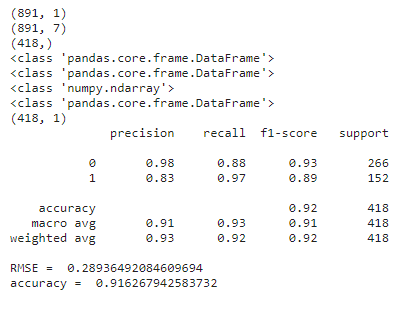

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100],'gamma':[1, 0.1, 0.01, 0.001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid, cv=5)
grid.fit(x_train, y_train)

'''response printed: 
    GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})'''

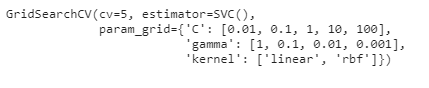

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

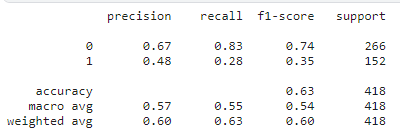

In [ ]:
grid.best_estimator_ # best found was: SVC(C=100, gamma=1, kernel='linear')

In [ ]:
grid.best_params_ # best found was: SVC(C=100, gamma=1, kernel='linear')

In [ ]:
y_pred_grid= grid.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred_grid)
print(classification_report(y_test, y_pred))